In [1]:
"""Import Libraries"""
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt

mnist = fetch_openml("mnist_784", version=1, parser="auto")
X, y = mnist["data"], mnist["target"]

2023-12-03 20:37:51.183670: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-03 20:37:51.242840: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-03 20:37:51.627835: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-03 20:37:51.627948: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-03 20:37:51.727827: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
# Cast labels as integers
y = y.astype(np.uint8)

# Split into test and train set. Since this data set is already randomized, we can just take the last 10k rows for test.
X_train = np.array(X.iloc[:60000])
y_train = np.array(y.iloc[:60000]).reshape(-1,1)
X_test = np.array(X.iloc[60000:])
y_test = np.array(y.iloc[:60000:])

In [3]:
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

X_train: (60000, 784)
y_train: (60000, 1)


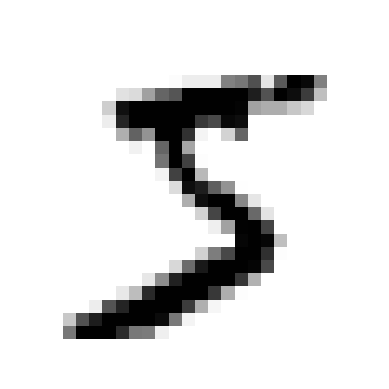

In [4]:
some_digit = np.array(X.iloc[0])
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [5]:
# Build the model

tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.Input(shape=[784]),
        Dense(units=25, activation="relu"),
        Dense(units=15, activation="relu"),
        Dense(units=10, activation="linear"),
    ],
    name = "my_model"
)

In [6]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                19625     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
Total params: 20175 (78.81 KB)
Trainable params: 20175 (78.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X_train,
    y_train,
    epochs = 50,
)

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1750
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1708
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1677
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1703
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1677
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1657
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1645
Epoch 8/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1628
Epoch 9/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1631
Epoch 10/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1619
Epoch 11/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1600
Epoch 12/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1597


In [11]:
model.save("my_mnist_classifier.h5")

/home/scott/Education/hands_on_ml/.venv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
model = tf.keras.models.load_model("my_mnist_classifier.h5")


In [13]:
print(history.history.keys())

dict_keys(['loss'])


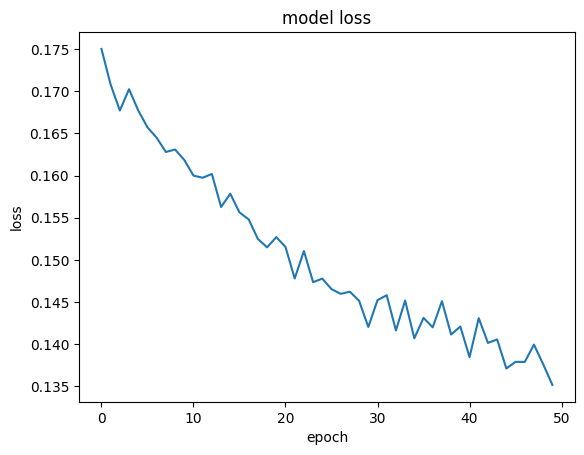

In [14]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


In [15]:
prediction = model.predict(some_digit.reshape(1,-1))

print(f" predictions: {prediction}")
print(f" Largest Prediction Index: {np.argmax(prediction)}")


1/1 [==============================] - 0s 146ms/step
 predictions: [[28.80378  44.47853  40.71555  57.327526 42.004307 64.877    42.804665
  49.167057 43.751423 53.69106 ]]
 Largest Prediction Index: 5
